In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"      # The kernel was crashing

import random
from pathlib import Path

import pandas as pd
from tqdm import tqdm

from ultralytics import YOLO

import supervision as sv
import numpy as np

In [4]:
import torch
print(torch.cuda.is_available())  
print(torch.cuda.get_device_name(0))  

True
NVIDIA GeForce RTX 4060 Laptop GPU


In [1]:
# Training

In [4]:
model = YOLO("yolov8m.pt")

results = model.train(
    data="../dataset/dataset.yaml", 
    epochs=25,
    batch=32,
    imgsz=416,
    device=0,
    verbose=True,
    patience=5
)

100%|██████████| 49.7M/49.7M [00:08<00:00, 6.09MB/s]


Ultralytics 8.3.78  Python-3.8.18 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=../dataset/dataset.yaml, epochs=25, time=None, patience=5, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 5.35M/5.35M [00:01<00:00, 4.84MB/s]


AMP: checks passed 


train: Scanning C:\ML_Competitions_Projects_Practice\IIT Gandhinagar selection task\dataset\labels\train... 1830 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1838/1838 [00:01<00:00, 1615.49it/s]


train: New cache created: C:\ML_Competitions_Projects_Practice\IIT Gandhinagar selection task\dataset\labels\train.cache


val: Scanning C:\ML_Competitions_Projects_Practice\IIT Gandhinagar selection task\dataset\labels\val... 203 images, 1 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 785.05it/s]

val: New cache created: C:\ML_Competitions_Projects_Practice\IIT Gandhinagar selection task\dataset\labels\val.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.38G      1.701      1.839      1.307        281        416: 100%|██████████| 58/58 [00:23<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        204       2455      0.877      0.192        0.2      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.26G      1.292     0.8489      1.074        228        416: 100%|██████████| 58/58 [00:21<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        204       2455       0.77      0.194     0.0875     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.57G       1.25     0.8295      1.047        187        416: 100%|██████████| 58/58 [00:21<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        204       2455      0.934      0.249      0.264      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.53G      1.239     0.7957      1.047        205        416: 100%|██████████| 58/58 [00:21<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        204       2455      0.888      0.213      0.211      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.65G      1.187     0.7405      1.029        233        416: 100%|██████████| 58/58 [00:21<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        204       2455      0.957      0.258      0.301        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.34G      1.143     0.7066      1.012        236        416: 100%|██████████| 58/58 [00:20<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        204       2455      0.947      0.269      0.334      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.65G      1.106     0.6813     0.9947        246        416: 100%|██████████| 58/58 [00:21<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        204       2455      0.967      0.268       0.31      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.55G      1.066     0.6362     0.9773        250        416: 100%|██████████| 58/58 [00:21<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        204       2455      0.757      0.338      0.376      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.61G      1.042      0.619     0.9737        234        416: 100%|██████████| 58/58 [00:21<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        204       2455      0.557      0.438      0.442      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.66G      1.025     0.6072     0.9643        316        416: 100%|██████████| 58/58 [00:21<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all        204       2455      0.402      0.439      0.433      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.45G      1.004     0.5865     0.9576        238        416: 100%|██████████| 58/58 [00:21<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        204       2455      0.824      0.464      0.526      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       5.7G     0.9544      0.558     0.9435        171        416: 100%|██████████| 58/58 [00:21<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        204       2455      0.849      0.451       0.54      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.39G     0.9414     0.5449     0.9381        210        416: 100%|██████████| 58/58 [00:21<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        204       2455      0.574      0.485      0.531      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.41G     0.9254     0.5378     0.9393        149        416: 100%|██████████| 58/58 [00:21<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        204       2455      0.788      0.514      0.586      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.72G     0.8889     0.5167     0.9243        147        416: 100%|██████████| 58/58 [00:21<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        204       2455      0.451      0.649      0.587      0.442


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.51G     0.8331     0.4833     0.9132         93        416: 100%|██████████| 58/58 [00:21<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        204       2455      0.831      0.402      0.483      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.32G     0.8164     0.4694     0.9067        144        416: 100%|██████████| 58/58 [00:20<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        204       2455      0.781      0.554      0.624      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.48G        0.8     0.4609     0.9049        163        416: 100%|██████████| 58/58 [00:20<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        204       2455      0.767      0.683      0.713      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.49G     0.7641     0.4391     0.8912        125        416: 100%|██████████| 58/58 [00:20<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        204       2455      0.865      0.635      0.735      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.46G     0.7533     0.4304     0.8861        162        416: 100%|██████████| 58/58 [00:20<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all        204       2455      0.875      0.656      0.741      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       5.5G     0.7117     0.4083     0.8764        121        416: 100%|██████████| 58/58 [00:20<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        204       2455      0.867      0.589      0.662       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.47G     0.6864     0.3923     0.8713        172        416: 100%|██████████| 58/58 [00:20<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        204       2455      0.892      0.614      0.785      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.45G      0.661       0.38     0.8653        152        416: 100%|██████████| 58/58 [00:20<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        204       2455      0.923      0.651      0.797      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.38G     0.6385     0.3722     0.8566        163        416: 100%|██████████| 58/58 [00:20<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        204       2455      0.802      0.816      0.835      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.51G     0.6162      0.358     0.8535        112        416: 100%|██████████| 58/58 [00:20<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        204       2455      0.832       0.76      0.832      0.662



25 epochs completed in 0.167 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train\weights\best.pt, 52.0MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.78  Python-3.8.18 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


                   all        204       2455      0.831      0.763      0.831      0.663
            Category_0        203       2435      0.958      0.939      0.977      0.802
            Category_1          5          7      0.818      0.571      0.768      0.663
            Category_2         13         13      0.717      0.779      0.748      0.524
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train


In [ ]:
df = pd.read_csv("runs/detect/train/results.csv")

In [6]:
df

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1   24.7420         1.70116         1.83886         1.30708   
1       2   48.7847         1.29160         0.84888         1.07355   
2       3   71.9906         1.25042         0.82948         1.04683   
3       4   95.2715         1.23890         0.79573         1.04660   
4       5  118.6940         1.18694         0.74045         1.02899   
5       6  141.9760         1.14291         0.70665         1.01242   
6       7  165.1750         1.10623         0.68134         0.99474   
7       8  188.4710         1.06604         0.63619         0.97726   
8       9  211.8860         1.04153         0.61902         0.97372   
9      10  235.0660         1.02505         0.60718         0.96429   
10     11  258.3430         1.00359         0.58645         0.95759   
11     12  281.9500         0.95436         0.55797         0.94351   
12     13  305.2130         0.94141         0.54486         0.93812   
13     14  328.2930         0.92543         0.53782         0.93928   
14     15  351.5660         0.88893         0.51671         0.92429   
15     16  393.9260         0.83310         0.48325         0.91317   
16     17  416.7840         0.81644         0.46942         0.90674   
17     18  439.7700         0.79998         0.46090         0.90486   
18     19  462.7710         0.76412         0.43913         0.89121   
19     20  485.9210         0.75332         0.43040         0.88611   
20     21  508.9940         0.71170         0.40831         0.87639   
21     22  531.8910         0.68640         0.39229         0.87131   
22     23  554.9280         0.66099         0.37999         0.86527   
23     24  577.9640         0.63855         0.37225         0.85655   
24     25  600.9820         0.61617         0.35795         0.85345   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.87676            0.19179           0.19973   
1                0.76960            0.19393           0.08747   
2                0.93379            0.24873           0.26398   
3                0.88834            0.21328           0.21126   
4                0.95729            0.25777           0.30086   
5                0.94671            0.26905           0.33390   
6                0.96702            0.26804           0.30980   
7                0.75686            0.33789           0.37613   
8                0.55746            0.43789           0.44160   
9                0.40155            0.43857           0.43301   
10               0.82446            0.46377           0.52604   
11               0.84852            0.45074           0.53977   
12               0.57416            0.48455           0.53121   
13               0.78775            0.51396           0.58570   
14               0.45089            0.64855           0.58704   
15               0.83080            0.40165           0.48338   
16               0.78118            0.55378           0.62440   
17               0.76694            0.68304           0.71326   
18               0.86479            0.63490           0.73504   
19               0.87478            0.65609           0.74112   
20               0.86713            0.58904           0.66150   
21               0.89175            0.61386           0.78504   
22               0.92318            0.65101           0.79681   
23               0.80158            0.81634           0.83511   
24               0.83210            0.76021           0.83191   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0               0.12278       1.33311       2.68716       1.14022  0.000468   
1               0.05181       1.39369       4.73658       1.15128  0.000907   
2               0.15059       1.37974       1.12402       1.11905  0.001308   
3               0.10603       1.75395       2.25040       1.22386  0.001259   
4               0.20047       1.14078       0.79780       1.02703  0.00

In [7]:
train_loss = df['train/box_loss']
val_loss = df['val/box_loss']

In [2]:
# Loss Convergence

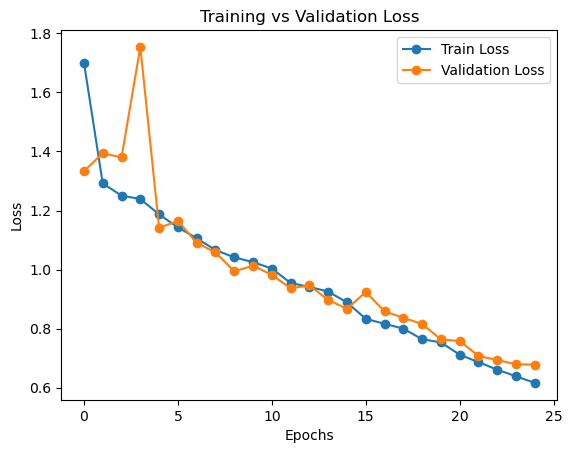

In [8]:
plt.plot(train_loss, label="Train Loss", marker='o')
plt.plot(val_loss, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

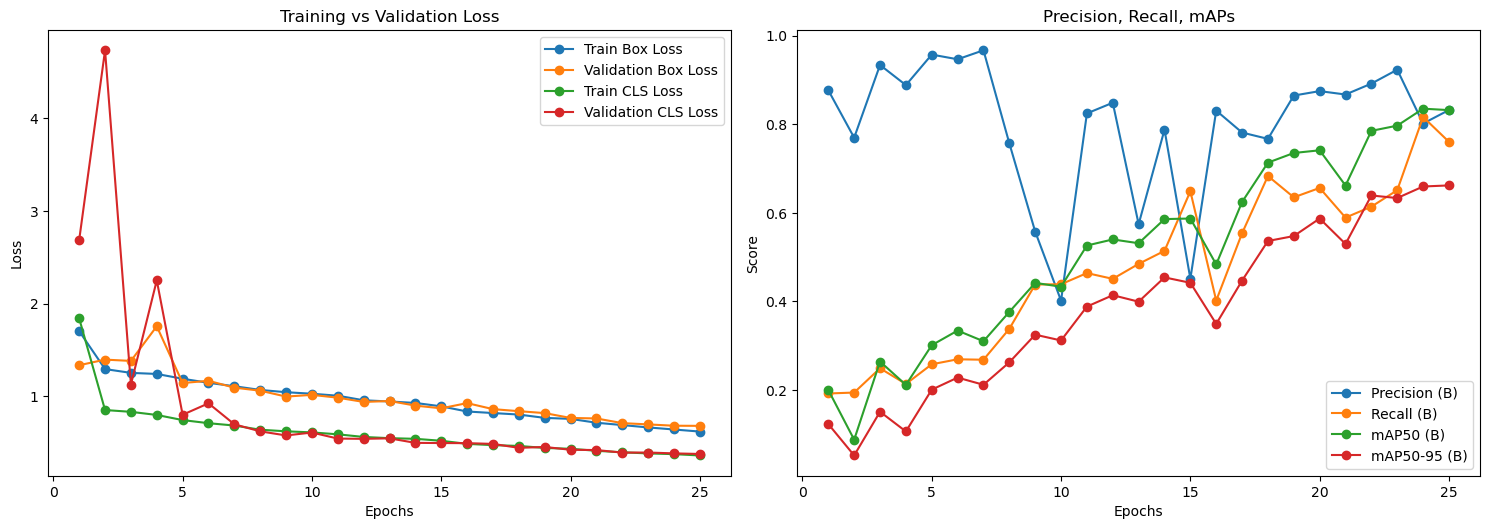

In [ ]:
epochs = df['epoch']
train_box_loss = df['train/box_loss']
train_cls_loss = df['train/cls_loss']
train_dfl_loss = df['train/dfl_loss']
val_box_loss = df['val/box_loss']
val_cls_loss = df['val/cls_loss']
val_dfl_loss = df['val/dfl_loss']
metrics_precision = df['metrics/precision(B)']
metrics_recall = df['metrics/recall(B)']
metrics_mAP50 = df['metrics/mAP50(B)']
metrics_mAP50_95 = df['metrics/mAP50-95(B)']

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs, train_box_loss, label="Train Box Loss", marker='o')
plt.plot(epochs, val_box_loss, label="Validation Box Loss", marker='o')
plt.plot(epochs, train_cls_loss, label="Train CLS Loss", marker='o')
plt.plot(epochs, val_cls_loss, label="Validation CLS Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics_precision, label="Precision (B)", marker='o')
plt.plot(epochs, metrics_recall, label="Recall (B)", marker='o')
plt.plot(epochs, metrics_mAP50, label="mAP50 (B)", marker='o')
plt.plot(epochs, metrics_mAP50_95, label="mAP50-95 (B)", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.legend()
plt.title("Precision, Recall, mAPs")

plt.tight_layout()
plt.show()

-----

In [3]:
# Comparing predictions and actual (test set)

In [15]:
image_dir = '../dataset/images/test'
label_dir = '../dataset/labels/test'

image_files = list(Path(image_dir).glob("*.tif"))

num_samples = 10
random_images = random.sample(image_files, num_samples)

In [16]:
def load_labels(image_path):
    label_file = Path(label_dir) / (image_path.stem + ".txt")
    if label_file.exists():
        with open(label_file, 'r') as f:
            labels = f.readlines()
        return labels
    return []

category_colors = {
    'Category_0': (66, 245, 93),
    'Category_1': (0, 255, 0),  
    'Category_2': (0, 0, 255),  
}

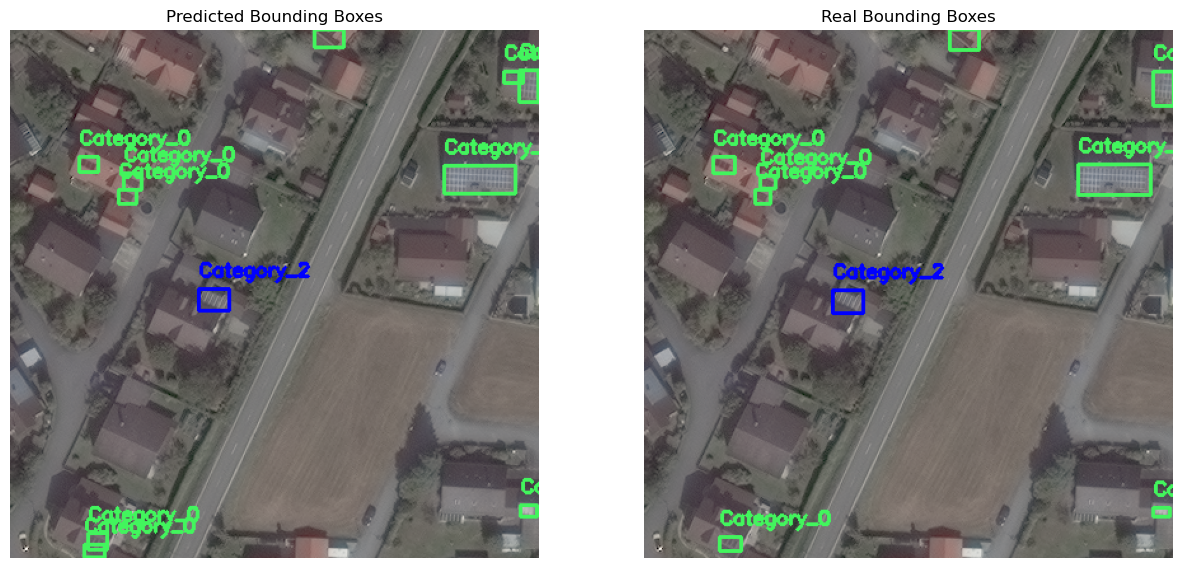

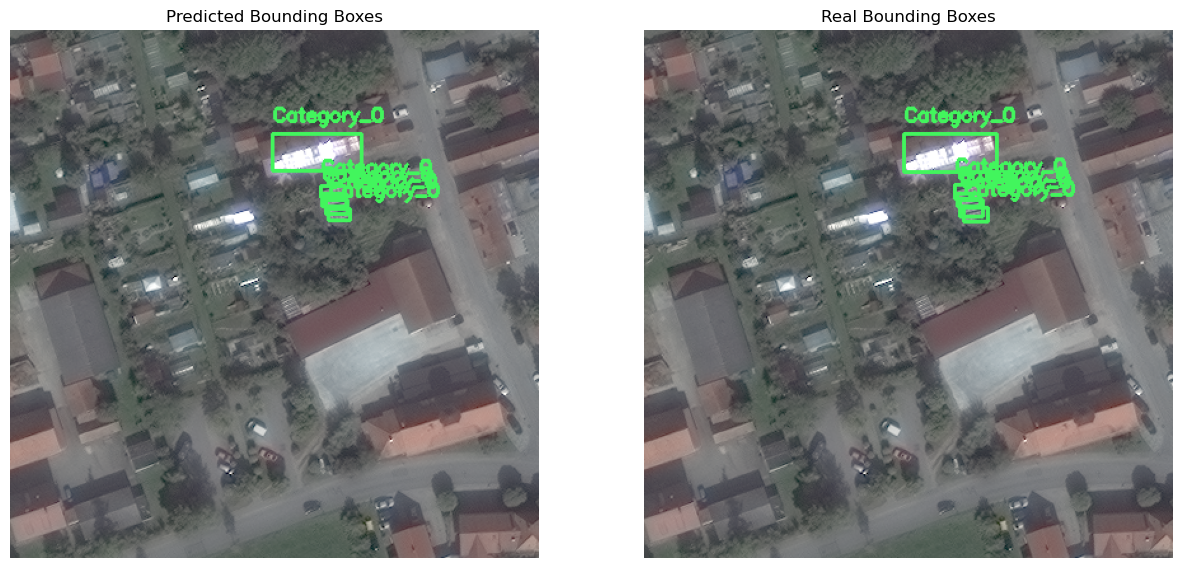

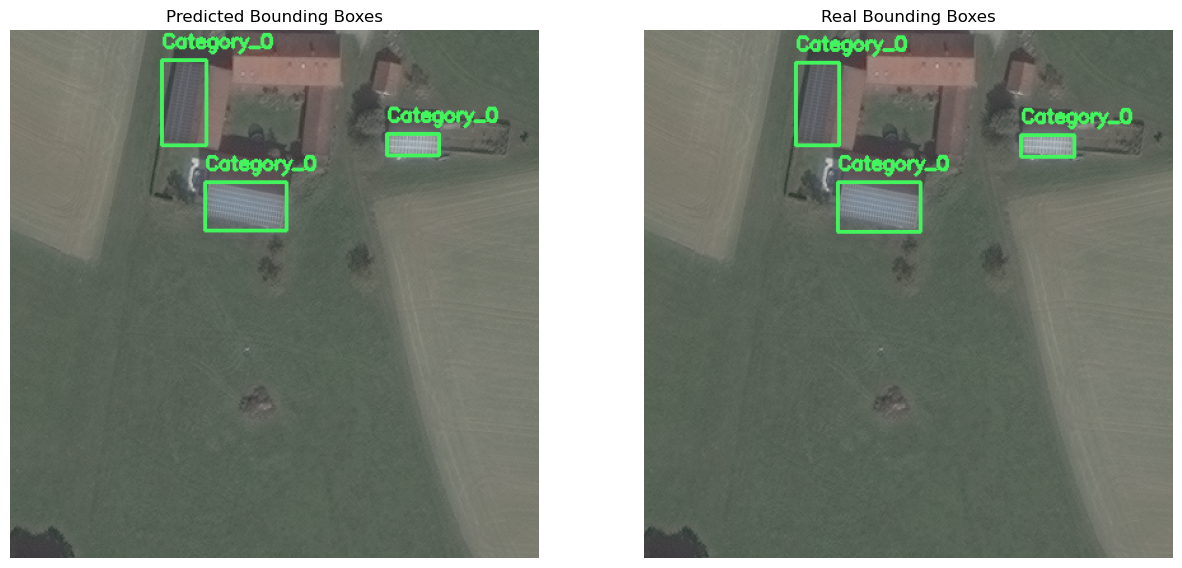

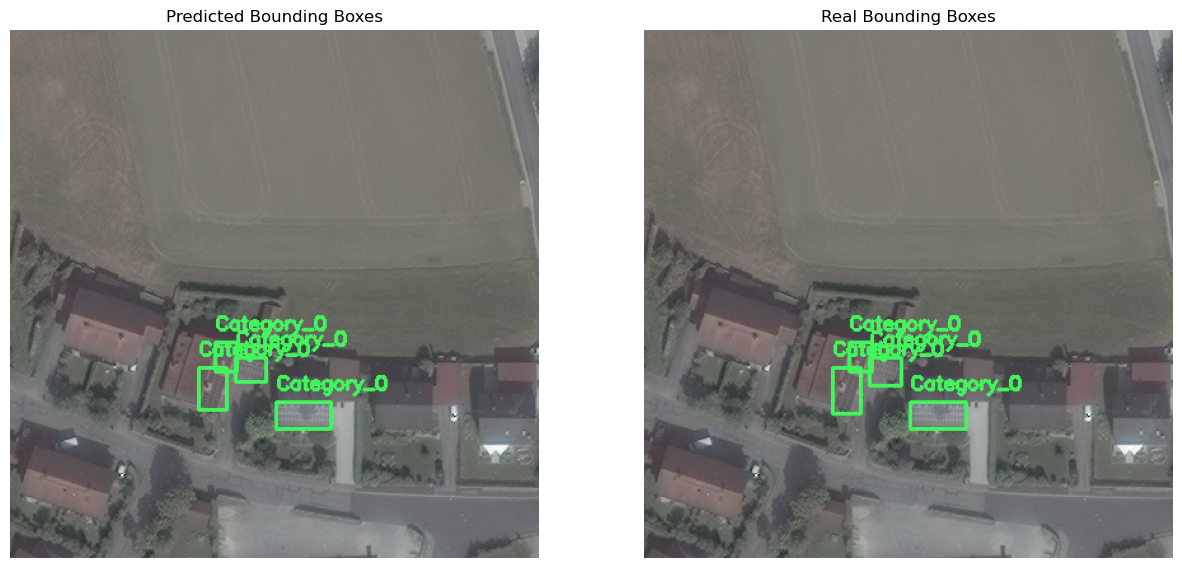

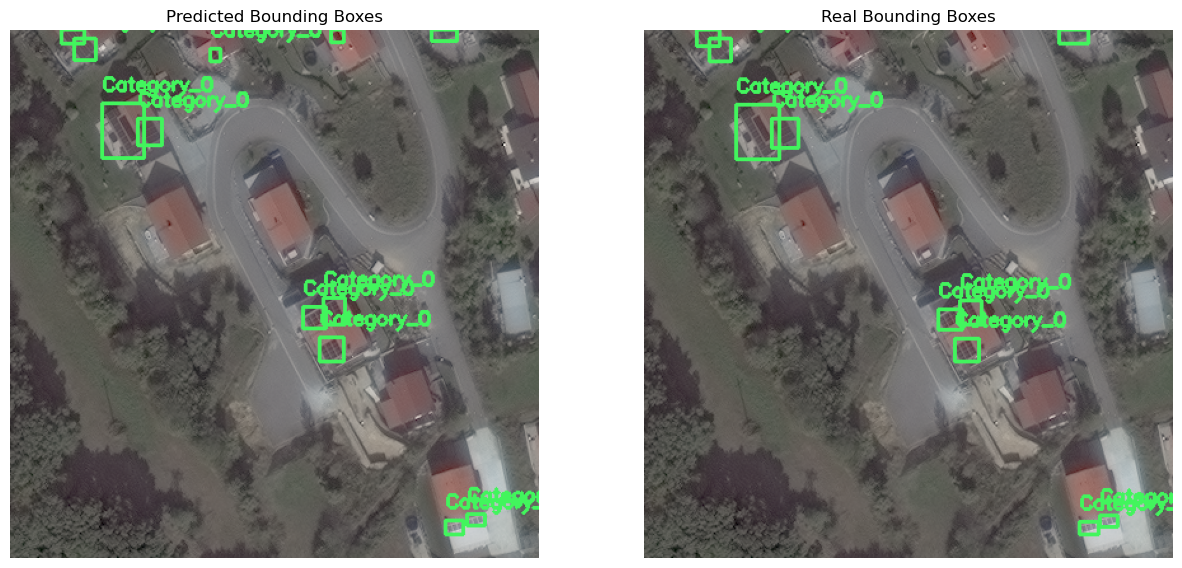

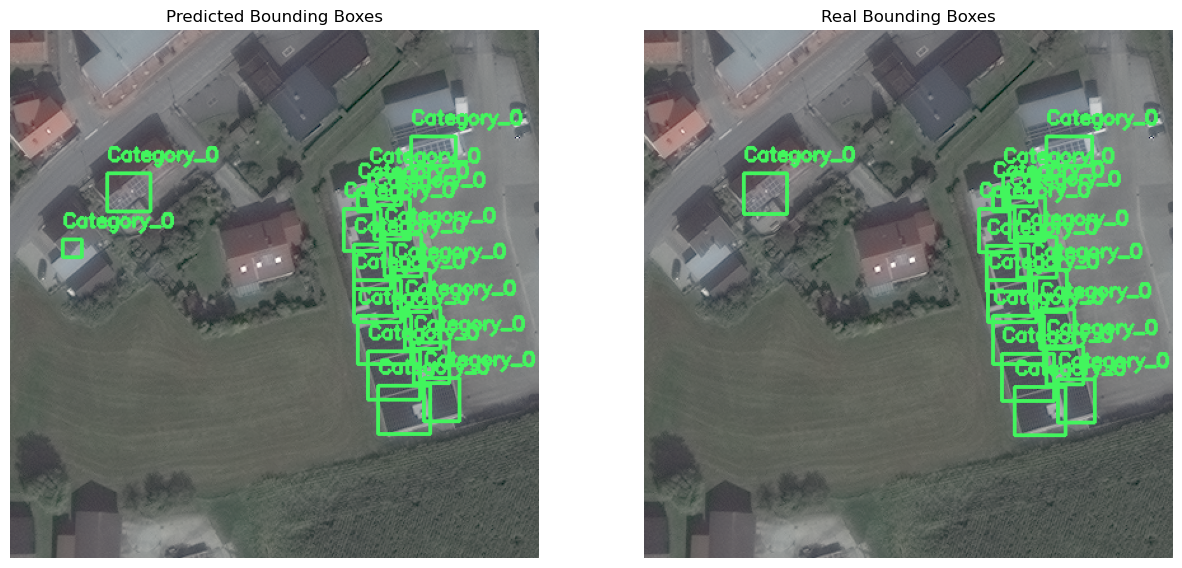

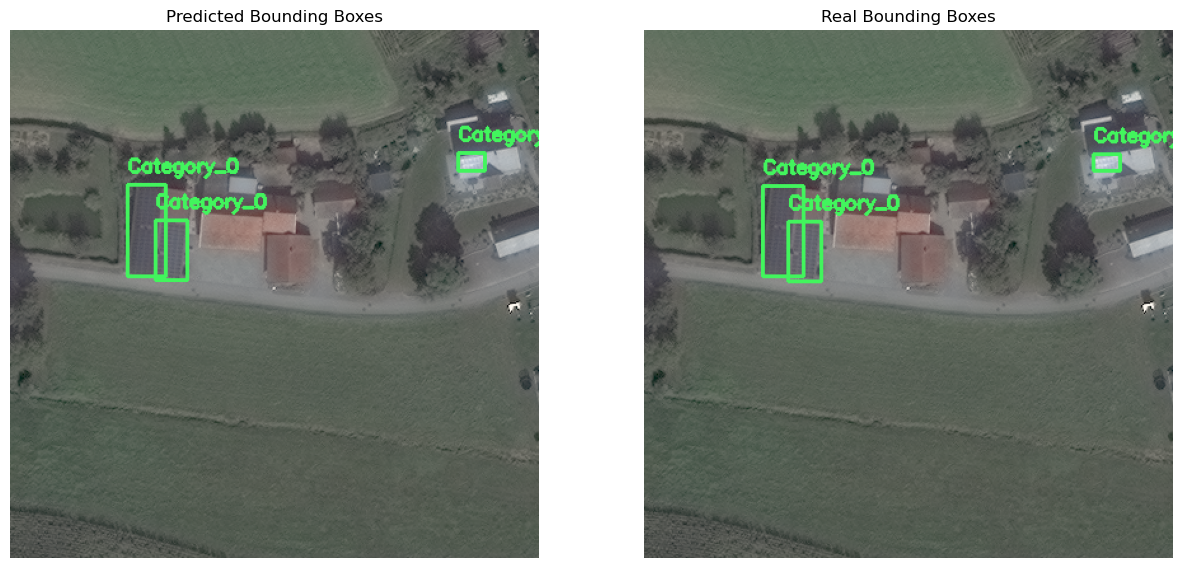

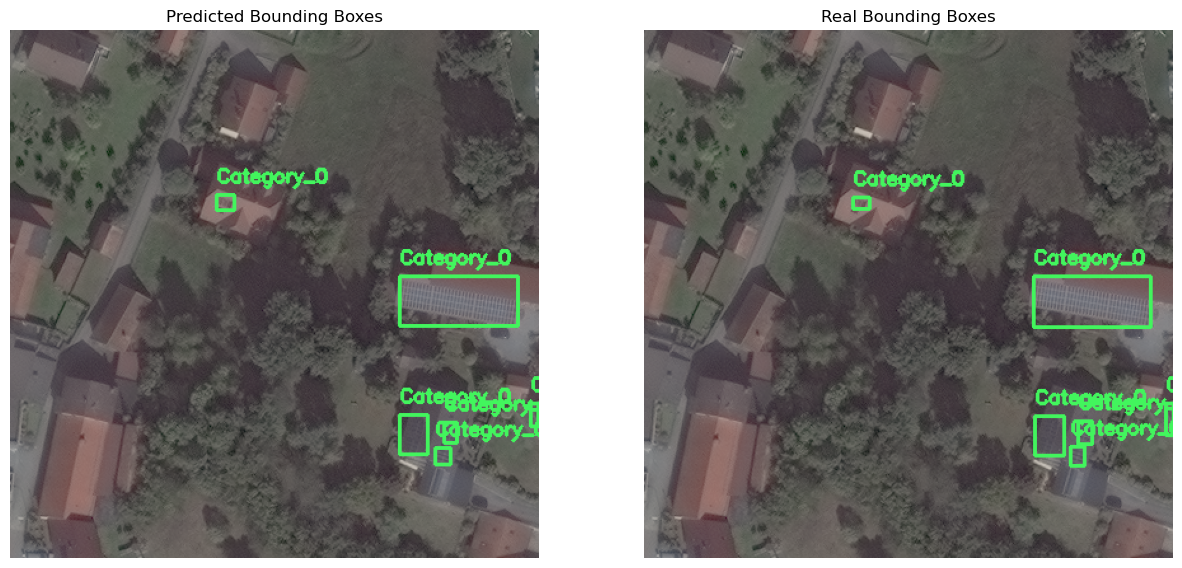

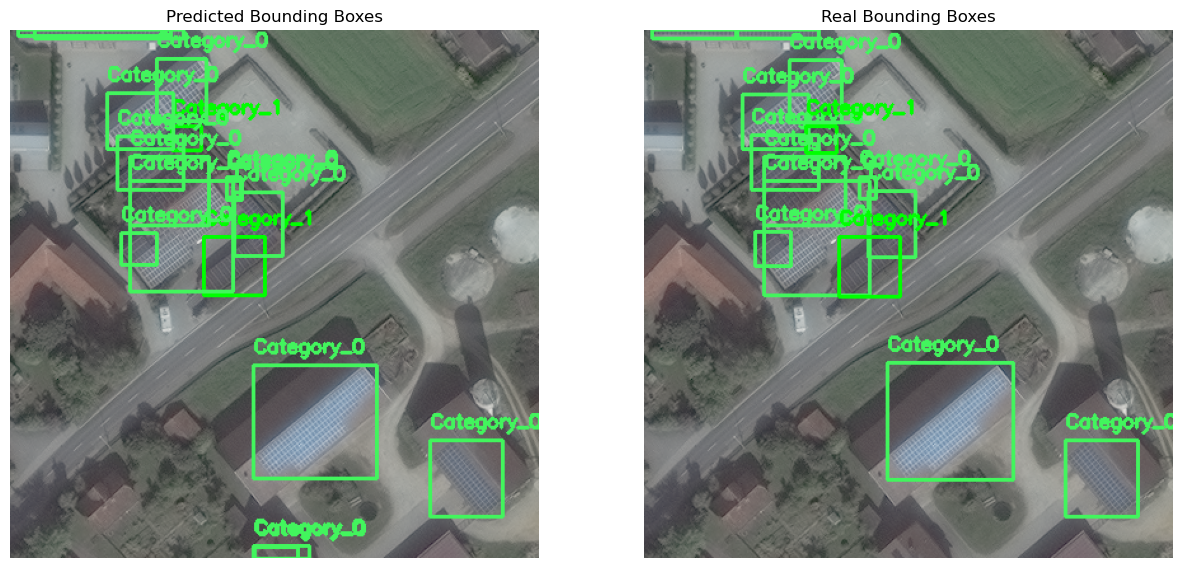

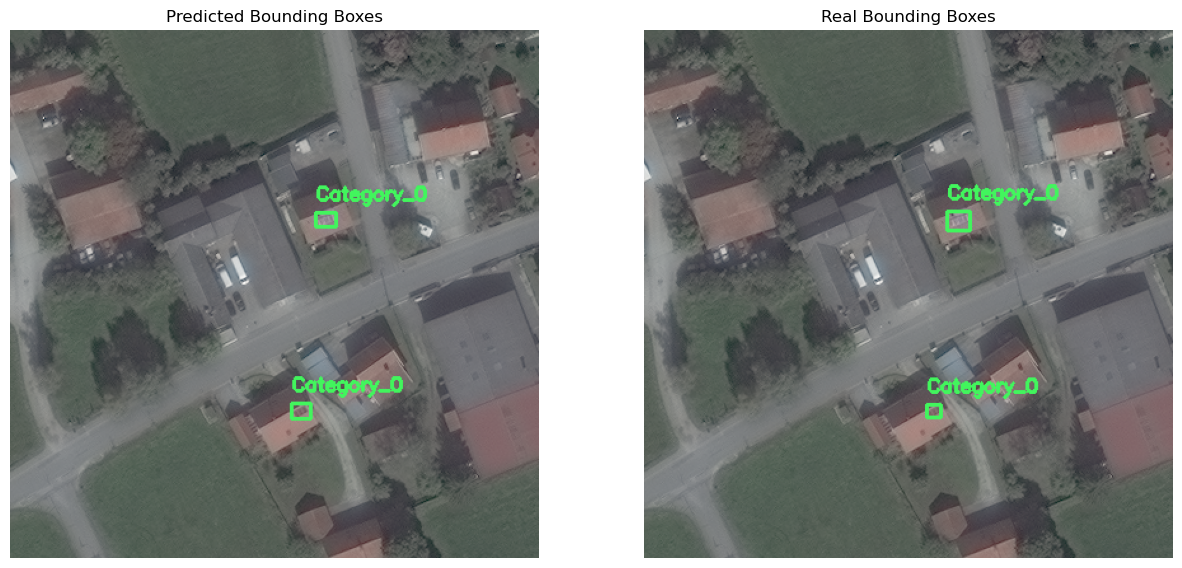

In [17]:
for img_path in random_images:
    img = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    results = model(img_path, verbose=False)

    boxes = results[0].boxes.xyxy.cpu().numpy() 
    class_ids = results[0].boxes.cls.cpu().numpy() 
    scores = results[0].boxes.conf.cpu().numpy() 

    predicted_img = img_rgb.copy()  
    for box, class_id, score in zip(boxes, class_ids, scores):
        x1, y1, x2, y2 = map(int, box)  
        class_name = f"Category_{int(class_id)}"  
        color = category_colors.get(class_name, (0, 255, 0))
        
        # label = f"{class_name} {score:.2f}" 
        label = f"{class_name}" 
        cv2.rectangle(predicted_img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(predicted_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    real_labels = load_labels(img_path)
    
    real_img = img_rgb.copy() 
    for label in real_labels:
        label_data = label.strip().split()
        class_id = int(label_data[0])  
        x_center, y_center, width, height = map(float, label_data[1:])  


        img_height, img_width = img.shape[:2]
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)

        class_name = f"Category_{class_id}"
        color = category_colors.get(class_name, (0, 255, 0))

        cv2.rectangle(real_img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(real_img, class_name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    axes[0].imshow(predicted_img)
    axes[0].axis('off')  
    axes[0].set_title('Predicted Bounding Boxes')

    axes[1].imshow(real_img)
    axes[1].axis('off')  
    axes[1].set_title('Real Bounding Boxes')

    plt.show()


------

In [15]:
model = YOLO("runs/detect/train/weights/best.pt")

image_dir = '../dataset/images/test'
label_dir = '../dataset/labels/test'

image_files = list(Path(image_dir).glob("*.tif"))

In [18]:
num_samples = 5
random_images = random.sample(image_files, num_samples)

def load_labels(image_path):
    label_file = Path(label_dir) / (image_path.stem + ".txt")
    if label_file.exists():
        with open(label_file, 'r') as f:
            labels = f.readlines()
        return labels
    return []

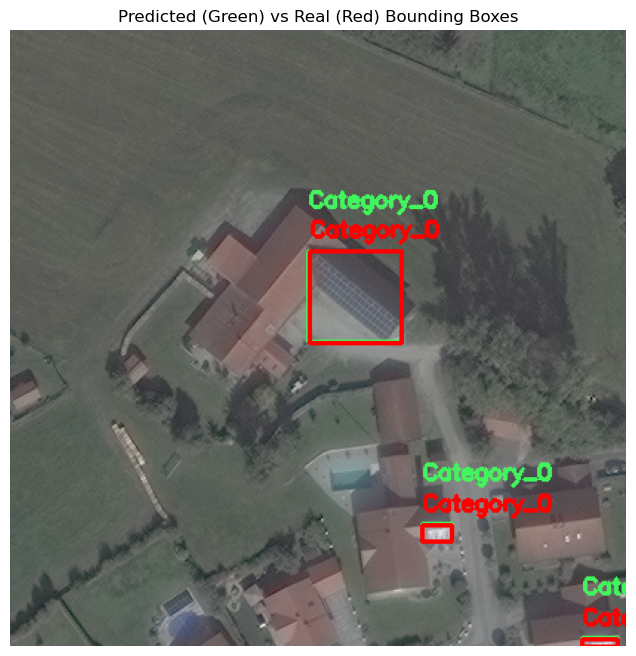

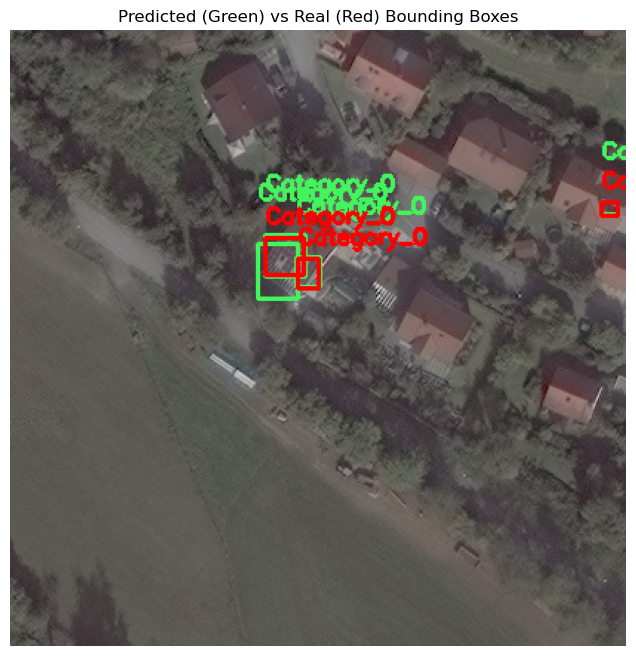

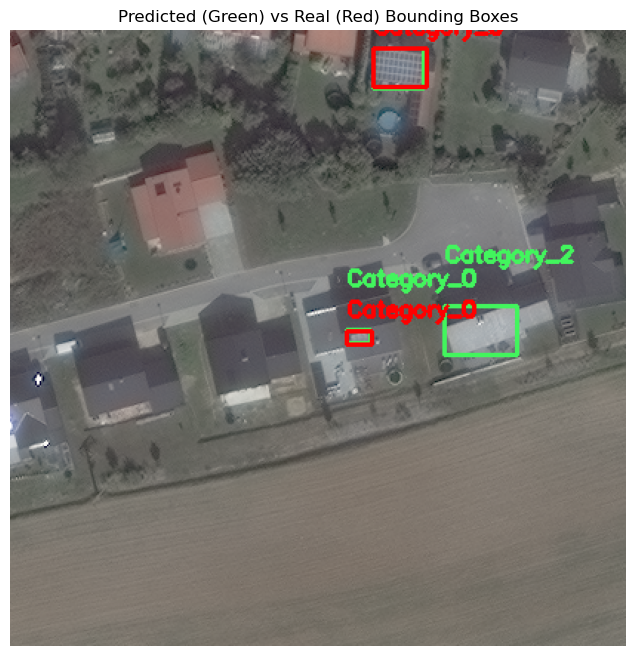

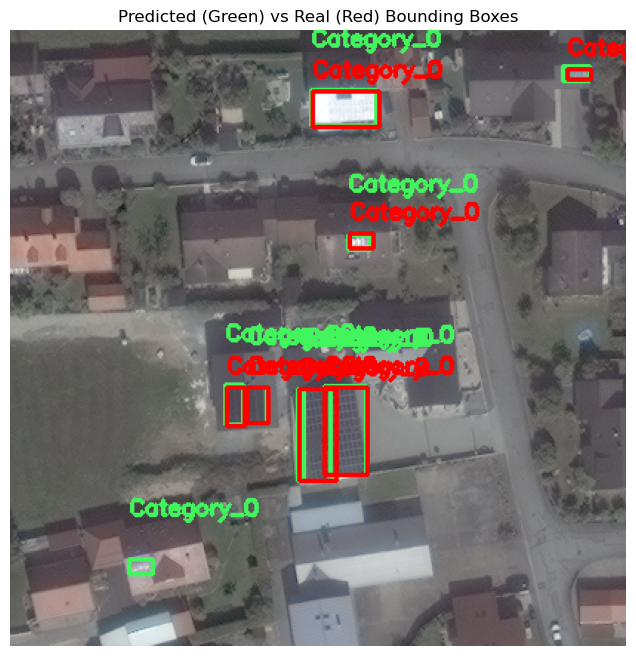

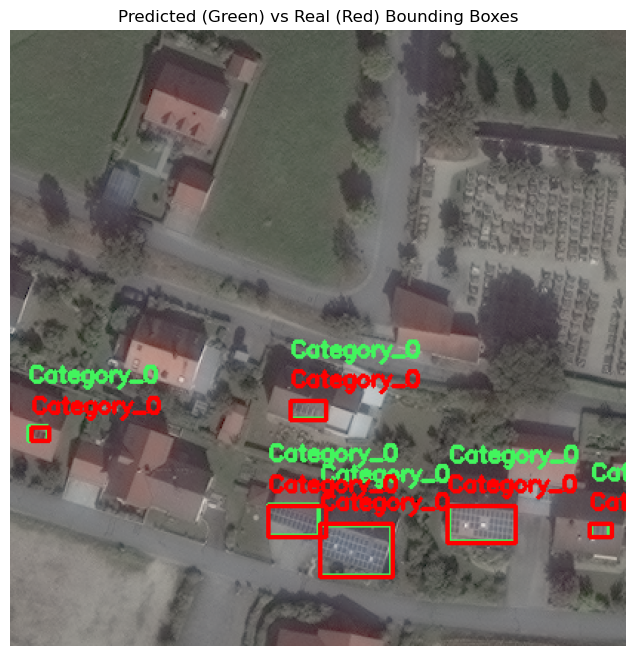

In [19]:
for img_path in random_images:
    img = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

    results = model(img_path, verbose=False)

    boxes = results[0].boxes.xyxy.cpu().numpy()
    class_ids = results[0].boxes.cls.cpu().numpy()
    scores = results[0].boxes.conf.cpu().numpy()

    predicted_img = img_rgb.copy()
    for box, class_id, score in zip(boxes, class_ids, scores):
        x1, y1, x2, y2 = map(int, box)
        class_name = f"Category_{int(class_id)}"

        label = f"{class_name}" 
        cv2.rectangle(predicted_img, (x1, y1), (x2, y2), (66, 245, 93), 2)
        cv2.putText(predicted_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (66, 245, 93), 2)

    real_labels = load_labels(img_path)

    real_img = img_rgb.copy()
    for label in real_labels:
        label_data = label.strip().split()
        class_id = int(label_data[0])
        x_center, y_center, width, height = map(float, label_data[1:])
        
        img_height, img_width = img.shape[:2]
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)

        class_name = f"Category_{class_id}"
        cv2.rectangle(real_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(real_img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    combined_img = img_rgb.copy()

    for box, class_id, score in zip(boxes, class_ids, scores):
        x1, y1, x2, y2 = map(int, box)
        class_name = f"Category_{int(class_id)}"
        cv2.rectangle(combined_img, (x1, y1), (x2, y2), (66, 245, 93), 2)
        cv2.putText(combined_img, class_name, (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (66, 245, 93), 2)

    for label in real_labels:
        label_data = label.strip().split()
        class_id = int(label_data[0])
        x_center, y_center, width, height = map(float, label_data[1:])
        img_height, img_width = img.shape[:2]
        
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)

        class_name = f"Category_{class_id}"
        cv2.rectangle(combined_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(combined_img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(combined_img)
    plt.axis('off')
    plt.title('Predicted (Green) vs Real (Red) Bounding Boxes')
    plt.show()

------

In [4]:
# Metrics by Yolo

In [32]:
metrics = model.val(data='../dataset/dataset.yaml', split='test')

Ultralytics 8.3.78  Python-3.8.18 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\ML_Competitions_Projects_Practice\IIT Gandhinagar selection task\dataset\labels\test.cache... 509 images, 2 backgrounds, 0 corrupt: 100%|██████████| 511/511 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]


                   all        511       5760      0.941      0.884      0.918      0.786
            Category_0        507       5700       0.98      0.937       0.98      0.852
            Category_1         13         18      0.856      0.833      0.847      0.757
            Category_2         34         42      0.985      0.881      0.927      0.749
Speed: 0.2ms preprocess, 6.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\val2


In [40]:
metrics.results_dict

{'metrics/precision(B)': 0.9405291950583106,
 'metrics/recall(B)': 0.8839157574640555,
 'metrics/mAP50(B)': 0.9182255390735031,
 'metrics/mAP50-95(B)': 0.7856808177893674,
 'fitness': 0.798935289917781}

---

In [5]:
# Metrics by supervision

In [6]:
## Mean Average Precision

In [ ]:
predictions_dir = "../dataset/testlabel_predictions"
os.makedirs(predictions_dir, exist_ok=True)

def save_predictions(image_path, boxes, class_ids, scores):
    label_file_path = Path(predictions_dir) / (image_path.stem + ".txt")
    
    with open(label_file_path, 'w') as f:
        for box, class_id, score in zip(boxes, class_ids, scores):
            x1, y1, x2, y2 = map(int, box)
            x_center = (x1 + x2) / 2.0
            y_center = (y1 + y2) / 2.0
            width = x2 - x1
            height = y2 - y1
            img_width, img_height = cv2.imread(str(image_path)).shape[1], cv2.imread(str(image_path)).shape[0]
            x_center /= img_width
            y_center /= img_height
            width /= img_width
            height /= img_height
            f.write(f"{class_id} {x_center} {y_center} {width} {height} {score}\n")

for img_path in tqdm(image_files):
    img = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img_path, verbose=False)

    boxes = results[0].boxes.xyxy.cpu().numpy()
    class_ids = results[0].boxes.cls.cpu().numpy()
    scores = results[0].boxes.conf.cpu().numpy()
    save_predictions(img_path, boxes, class_ids, scores)

100%|██████████| 511/511 [00:10<00:00, 47.27it/s]


In [ ]:
ground_truth_dir = "../dataset/labels/test/"
predictions_dir = "../dataset/testlabel_predictions/"

all_confusion_matrices = []

class_names = ['Category_1', 'Category_2', 'Category_3'] 

In [56]:
def yolo_to_corners(x_center, y_center, width, height):
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2
    return x_min, y_min, x_max, y_max

In [ ]:
all_targets = []
all_predictions = []

for file in tqdm(os.listdir(ground_truth_dir)):
    label_file = ground_truth_dir + file
    pred_file = predictions_dir + file

    with open(label_file, 'r') as f:
        targets = []
        for line in f:
            parts = line.strip().split()  
            class_id = int(float(parts[0]))
            x_center, y_center, width, height = map(float, parts[1:])
            x_min, y_min, x_max, y_max = yolo_to_corners(x_center, y_center, width, height)
            targets.append([x_min, y_min, x_max, y_max, class_id])
        targets = np.array(targets)
        if targets.shape[0] == 0:
            continue  

    with open(pred_file, 'r') as f:
        predictions = []
        for line in f:
            parts = line.strip().split()  
            class_id = int(float(parts[0]))  
            confidence = float(parts[5])  
            x_center, y_center, width, height = map(float, parts[1:5])
            x_min, y_min, x_max, y_max = yolo_to_corners(x_center, y_center, width, height)
            predictions.append([x_min, y_min, x_max, y_max, class_id, confidence])
        predictions = np.array(predictions)
        # if predictions.shape[0] == 0:
        #     continue  # Without this, the below ConfusionMatrix throws an error
        all_predictions.append(predictions)
        all_targets.append(targets)

100%|██████████| 509/509 [00:00<00:00, 6450.01it/s]


In [64]:
mean_avg_p = sv.MeanAveragePrecision.from_tensors(
        predictions=all_predictions,
        targets=all_targets,
)

print(mean_avg_p)
print("mAP50 : ", mean_avg_p.map50)

MeanAveragePrecision(map50_95=0.7781256341051066, map50=0.9391929714204511, map75=0.8956833504213648, per_class_ap50_95=array([[0.98, 0.98, 0.98, 0.97, 0.95, 0.93, 0.87, 0.77, 0.56, 0.21],
       [0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.74, 0.53, 0.07],
       [0.96, 0.96, 0.94, 0.94, 0.92, 0.88, 0.78, 0.6 , 0.47, 0.2 ]]))
mAP50 :  0.9391929714204511


In [ ]:
print("The mAP50 by model.val (by YOLO) is : ", metrics.results_dict['metrics/mAP50(B)'])
print("The mAP50 by sv.MeanAveragePrecision is : ", mean_avg_p.map50)

The mAP50 by model.val (by YOLO) is :  0.9182255390735031
The mAP50 by sv.MeanAveragePrecision is :  0.9391929714204511


In [ ]:
# The mAP50 by supervision is showing better results because we are skipping over the files which don't have any predictions in it. 
# But they should be counted as :
# False Positive : When model predicts the object which is not present
# False negative : Model fails to predict the object

In [ ]:
# confusion_matrix = sv.ConfusionMatrix.from_tensors(
#         predictions=all_predictions,
#         targets=all_targets,
#         classes=[0, 1, 2]
#     )

# Not able to pass like this
# Error : IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed\

# If we want to run this, we have to uncomment these lines above
# if predictions.shape[0] == 0:
        #     continue  # Skip files with no predictions

In [7]:
# Confusion matrix and table

In [67]:
np.set_printoptions(precision=2, suppress=True)

In [ ]:
iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
confidence_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

results = pd.DataFrame(index=iou_thresholds, columns=confidence_thresholds)

class_names = ['Category_0', 'Category_1', 'Category_2']

for iou_threshold in tqdm(iou_thresholds):
    for conf_threshold in confidence_thresholds:
        precision_list = []
        recall_list = []
        f1_list = []

        for file in (os.listdir(ground_truth_dir)):
            label_file = ground_truth_dir + file
            pred_file = predictions_dir + file

            with open(label_file, 'r') as f:
                targets = []
                for line in f:
                    parts = line.strip().split()
                    class_id = int(float(parts[0]))
                    x_center, y_center, width, height = map(float, parts[1:])
                    x_min, y_min, x_max, y_max = yolo_to_corners(x_center, y_center, width, height)
                    targets.append([x_min, y_min, x_max, y_max, class_id])
                targets = np.array(targets)

            with open(pred_file, 'r') as f:
                predictions = []
                for line in f:
                    parts = line.strip().split()  
                    class_id = int(float(parts[0]))
                    confidence = float(parts[5])
                    x_center, y_center, width, height = map(float, parts[1:5])
                    x_min, y_min, x_max, y_max = yolo_to_corners(x_center, y_center, width, height)
                    predictions.append([x_min, y_min, x_max, y_max, class_id, confidence])
                predictions = np.array(predictions)

            
            if predictions.shape[0]==0:
                if targets.shape[0]==0:
                    continue
                elif targets.shape[0]!=0:
                    FN += targets.shape[0]
                    continue
            if predictions.shape[0]!=0 and targets.shape[0]!=0:   
                confusion_matrix = sv.ConfusionMatrix.from_tensors(
                    predictions=[predictions],
                    targets=[targets],
                    classes=class_names,
                    iou_threshold=iou_threshold,
                    conf_threshold=conf_threshold
                )

            TP = confusion_matrix.matrix[0, 0]
            FP = confusion_matrix.matrix[0, 1:].sum()
            FN = confusion_matrix.matrix[1:, 0].sum()

            precision = TP / (TP + FP) 
            recall = TP / (TP + FN) 
            f1 = 2 * (precision * recall) / (precision + recall)

            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)
        avg_f1 = np.mean(f1_list)

        results.loc[iou_threshold, conf_threshold] = f"Precision: {avg_precision:.2f}, Recall: {avg_recall:.2f}, F1: {avg_f1:.2f}"

100%|██████████| 5/5 [00:05<00:00,  1.04s/it]


In [ ]:
results    # Rows -> iou thresholds and columns -> confidence thresholds

0.1  \
0.1  Precision: 0.96, Recall: 0.92, F1: 0.93   
0.3  Precision: 0.96, Recall: 0.92, F1: 0.93   
0.5  Precision: 0.95, Recall: 0.91, F1: 0.92   
0.7  Precision: 0.89, Recall: 0.86, F1: 0.87   
0.9  Precision: 0.46, Recall: 0.45, F1: 0.45   

                                         0.3  \
0.1  Precision: 0.95, Recall: 0.93, F1: 0.94   
0.3  Precision: 0.95, Recall: 0.93, F1: 0.94   
0.5  Precision: 0.95, Recall: 0.92, F1: 0.93   
0.7  Precision: 0.89, Recall: 0.87, F1: 0.87   
0.9  Precision: 0.46, Recall: 0.45, F1: 0.46   

                                         0.5  \
0.1  Precision: 0.93, Recall: 0.96, F1: 0.94   
0.3  Precision: 0.93, Recall: 0.96, F1: 0.94   
0.5  Precision: 0.92, Recall: 0.95, F1: 0.93   
0.7  Precision: 0.88, Recall: 0.90, F1: 0.88   
0.9  Precision: 0.46, Recall: 0.47, F1: 0.46   

                                         0.7  \
0.1  Precision: 0.87, Recall: 0.98, F1: 0.91   
0.3  Precision: 0.87, Recall: 0.98, F1: 0.91   
0.5  Precision: 0.86, Recall: 0.97, F1: 0.90   
0.7  Precision: 0.83, Recall: 0.93, F1: 0.87   
0.9  Precision: 0.45, Recall: 0.50, F1: 0.47   

                                         0.9  
0.1  Precision: 0.38, Recall: 0.79, F1: 0.47  
0.3  Precision: 0.38, Recall: 0.79, F1: 0.47  
0.5  Precision: 0.38, Recall: 0.79, F1: 0.47  
0.7  Precision: 0.38, Recall: 0.79, F1: 0.47  
0.9  Precision: 0.31, Recall: 0.64, F1: 0.38